# 자연어처리 시작하기
* soynlp(https://github.com/lovit/soynlp)로 토큰화하고 명사를 추출해 워드클라우드 그려보기

In [ ]:
!pip install soynlp

     |████████████████████████████████| 416 kB 9.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip show soynlp

Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.7/dist-packages
Requires: psutil, scipy, numpy, scikit-learn
Required-by: 


In [ ]:
import pandas as pd
import numpy as np
import re

# 데이터 로드하기
*  데이터 출처 : https://github.com/akngs/petitions

In [ ]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증을 합니다.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# url ='https://drive.google.com/open?id=1d8VEAj6n83wT1YRlCrhoU_1mMSvYpXc4'
# id = url.split('=')[1]
# print(id)

In [ ]:
# # 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('petition.csv')  

In [ ]:
a='/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/merchant/1386to1676_merchant.csv'
b='/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/merchant/1677to_merchant.csv'
c='/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/merchant/2113to_merchant.csv'
d='/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/merchant/3620to_merchant.csv'
e='/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/merchant/7370to_merchant.csv'
f='/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/petitions_b.csv'

In [ ]:
df = pd.read_csv(f, index_col=0, \
                 parse_dates=['sday', 'eday'])
# 데이터의 크기가 어느정도인지 본다.
df.shape

(2655, 9)

In [ ]:
df.shape

(125, 9)

In [ ]:
df.tail()

,progress,title,like,contents,answer,category,sday,eday,proponent
number,,,,,,,,,
602980,청원진행중,"백신 관련 원론적인 답변 말고, 진짜 질문에 대한 답변을 듣고 싶습니다.",1016,"안녕하세요\n백신패스 관련해서 답변도 올라와 있고, 소아 청소년 백신 접종 관련 ...",NaN,보건복지,2021-12-13,2022-01-12,kakao
602984,청원진행중,"독서실, 스터디카페, 학원 등 학습시설에 대한 방역패스(=백신패스)의 신속한 철회 ...",1140,"안녕하세요, 저는 국가고시를 준비하고 있는 대학생입니다. 매일같이 스터디카페에 가서...",NaN,보건복지,2021-12-13,2022-01-12,naver
602987,청원진행중,학교로 찾아가는 백신접종을 결사 반대합니다.,1081,"학교로 찾아가는 백신접종을 결사 반대합니다.\n\n첫째, 성분을 알 수 없고 심각한...",NaN,보건복지,2021-12-13,2022-01-12,naver
602988,청원진행중,"헌법에 위법한 방역패스 정책으로 자영업자, 소아, 청소년, 국민들 그만 죽이시고 이...",1844,저는 작은 카페를 운영하고 있는 30대 자영업자 입니다.\n와이프와 일곱살 딸아이를...,NaN,보건복지,2021-12-13,2022-01-12,naver
602992,청원진행중,임산부와 난임치료자는 백신패스 면제해주십시오.,2430,정부의 백신패스 대상자에 임산부와 난임치료자는 제외시켜주십시오. \n\n현재 백신은...,NaN,보건복지,2021-12-13,2022-01-12,naver


## 자신의 관심사에 맞는 단어로 데이터를 가져옵니다.

In [ ]:
# p = r'.*(돌봄|육아|초등|보육).*'
# care = df[df['title'].str.match(p) |
#            df['content'].str.match(p, flags=re.MULTILINE)]
# care.shape

In [ ]:
# care.head()

In [ ]:
# care.tail(3)

In [ ]:
# # 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
# sample_index = 25

In [ ]:
# sample_title = df.loc[24, 'title']
# sample_title

In [ ]:
# sample_content = df['contents'][sample_index]
# sample_content

# 토큰화

In [ ]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

/usr/local/lib/python3.7/dist-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [ ]:
# tokened_title = tokenizer.tokenize(sample_title)
# tokened_title

In [ ]:
# tokened_content = tokenizer.tokenize(sample_content)
# tokened_content[:20]

In [ ]:
# print(len(tokened_title))
# print(len(tokened_content))

# 텍스트 데이터 전처리 
* 개행문자 제거

In [ ]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', str(text))
    return text

In [ ]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = df['contents'].apply(preprocessing)

CPU times: user 13.1 ms, sys: 998 µs, total: 14.1 ms
Wall time: 19.2 ms


In [ ]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 5.29 s, sys: 55.6 ms, total: 5.35 s
Wall time: 5.36 s


number
586500    [저는, 경북포항에, 사는, 임산부입니다, 경기도, 지역에, 병원, 진료를, 받기위...
586505    [신천지, 압수수색, 시간끌며, 코로나, 확산, 방조한, 윤석열, 검찰총장, 해임을...
586511    [안녕하세요, ., 저는, 19, 살, 여학생입니다, ., 제가, 아직, 어린나이에...
Name: contents, dtype: object

In [ ]:
# tokens[3][:3]

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
!pip install wordcloud

In [ ]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무', '주세요', '입니다', '제발',
                '그래서', '현재', '너무', '명', '000', '몇명', '계속', '000명', '8명', '9명',
                '느닷', '촘촘', '5단계'] 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [ ]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [ ]:
from soynlp.noun import LRNounExtractor

In [ ]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (45437, 22891) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 9899 nouns are extracted
CPU times: user 13.7 s, sys: 50.7 ms, total: 13.8 s
Wall time: 13.8 s


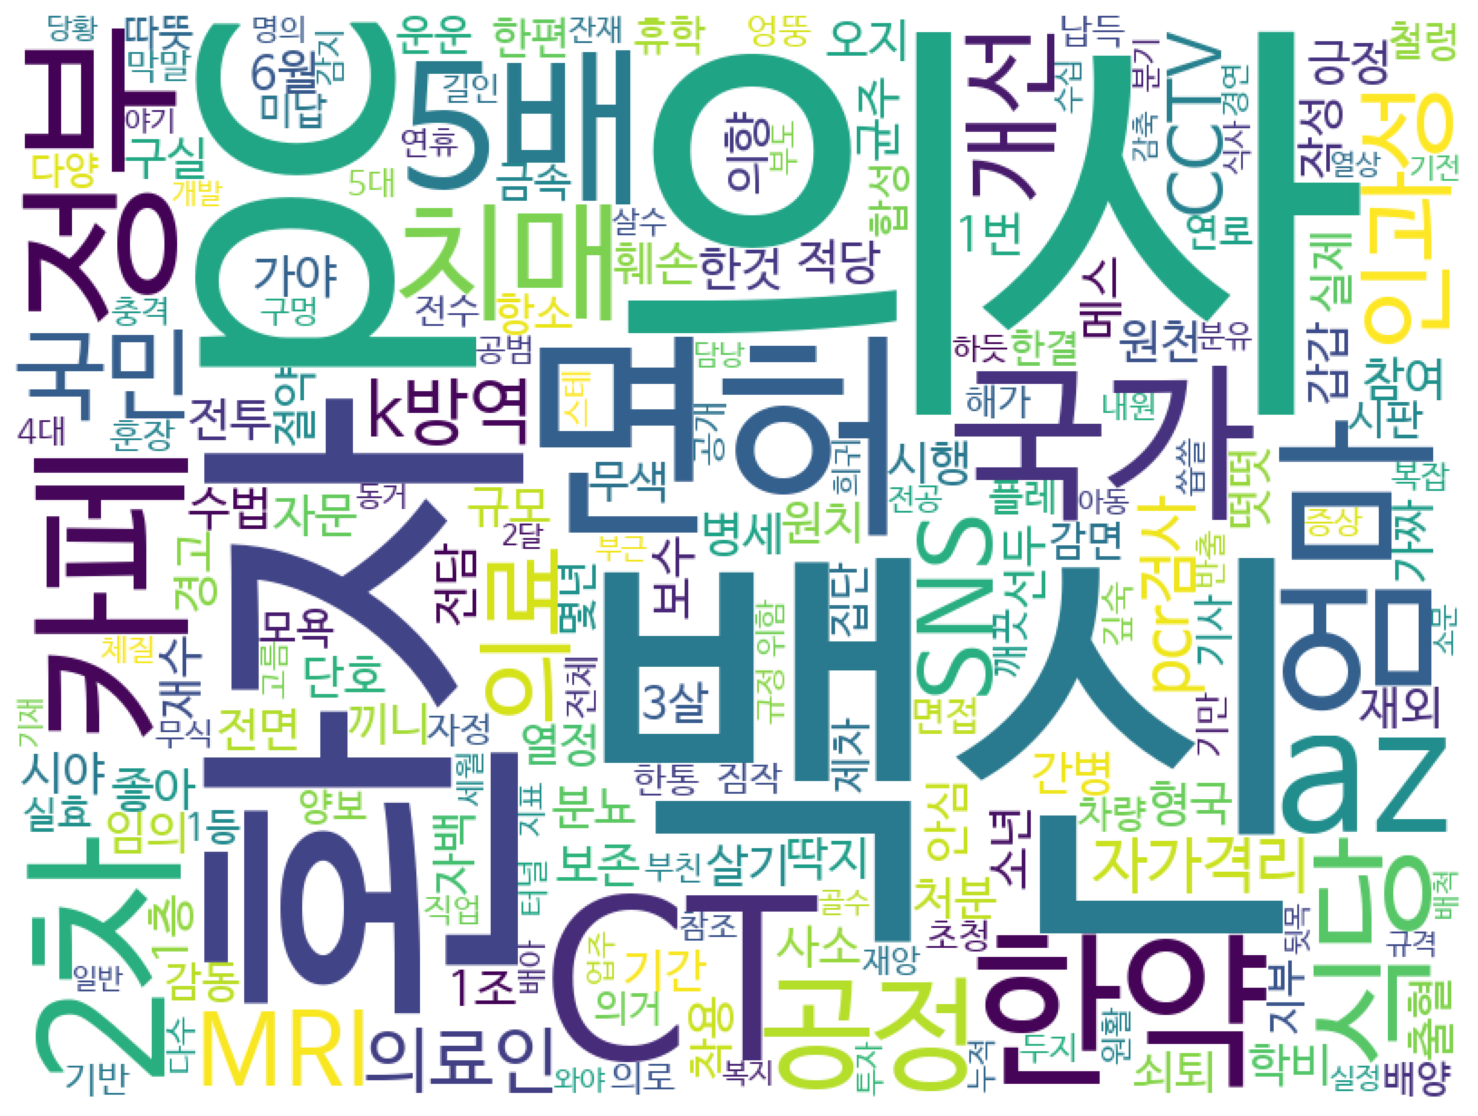

CPU times: user 2.31 s, sys: 117 ms, total: 2.42 s
Wall time: 2.42 s


In [ ]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))